In [1]:
import matplotlib.pyplot as plt
import networkx as nx
import pandas as pd


df=pd.read_csv('olympic_medals.csv')
countries=[]
colors=[]
i=0
colors.append("orange")
while len(countries)!=10:
    if df['country_code'][i] not in countries:
        colors.append("green")
        countries.append(df['country_code'][i])
    i+=1

In [2]:
g=nx.Graph()
g.add_node("Countries")
sizes=[200]
colors=["green"]
for i in range(len(countries)):
    g.add_node(countries[i])
    sizes.append(200)
    colors.append("orange")
edges=[("Countries", i) for i in countries]

In [3]:
medals=[]

for i in range(10):
    medals.append([0,0,0])

for i in range(len(df)):
    if df['country_code'][i] in countries:
        if df['medal_type'][i]=="GOLD":
            medals[countries.index(df['country_code'][i])][0]+=1
        elif df['medal_type'][i]=="SILVER":
            medals[countries.index(df['country_code'][i])][1]+=1
        elif df['medal_type'][i]=="BRONZE":
            medals[countries.index(df['country_code'][i])][2]+=1

In [4]:
medals[1][1]=3
medals[0][1]=86

In [5]:
for i in range(len(countries)):
    g.add_node(medals[i][0])
    sizes.append(5*medals[i][0])
    edges.append((countries[i], medals[i][0]))
    colors.append("gold")
    g.add_node(medals[i][1])
    sizes.append(5*medals[i][1])
    edges.append((countries[i], medals[i][1]))
    colors.append("silver")
    g.add_node(medals[i][2])
    sizes.append(5*medals[i][2])
    edges.append((countries[i], medals[i][2]))
    colors.append("brown")

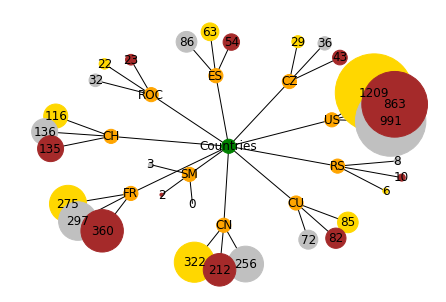

In [7]:
g.add_edges_from(edges)
nx.draw(g, node_color=colors, node_size=sizes,  with_labels=True)
plt.show()